# Explore here

In [2]:
import pandas as pd

total_data =  pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
total_data.head()



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
total_data.shape

(48895, 16)

In [4]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Existen un total de 48.895 filas (en este caso, direcciones de Airbnb en NY) y 16 columnas, de entre las que encontramos el objetivo o clase a predecir, Price.


Las variables last_review y reviews_per_month contienen más de 10K valores nulos (de los 48.895 comentados previamente).
Las variables hsot_name y name también cuentan con valores nulos, pero ambos, menos de 20. El resto de variables cuentan siempre con valor.

Los datos cuentan con 10 características numéricas y 6 características categóricas.

In [5]:
total_data.drop("id", axis = 1).duplicated().sum()

np.int64(0)

No hemos encontrado duplicados en las columna que tomaremos como base para el EDA, que es la columna "id", por lo que no utilizaremos la opcion drop duplicates en esta ocasión.

In [6]:
total_data.drop(["id", "name", "host_id", "host_name"], axis = 1, inplace = True)
total_data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


ANÁLISIS DE VARIABLES UNIVARIANTE

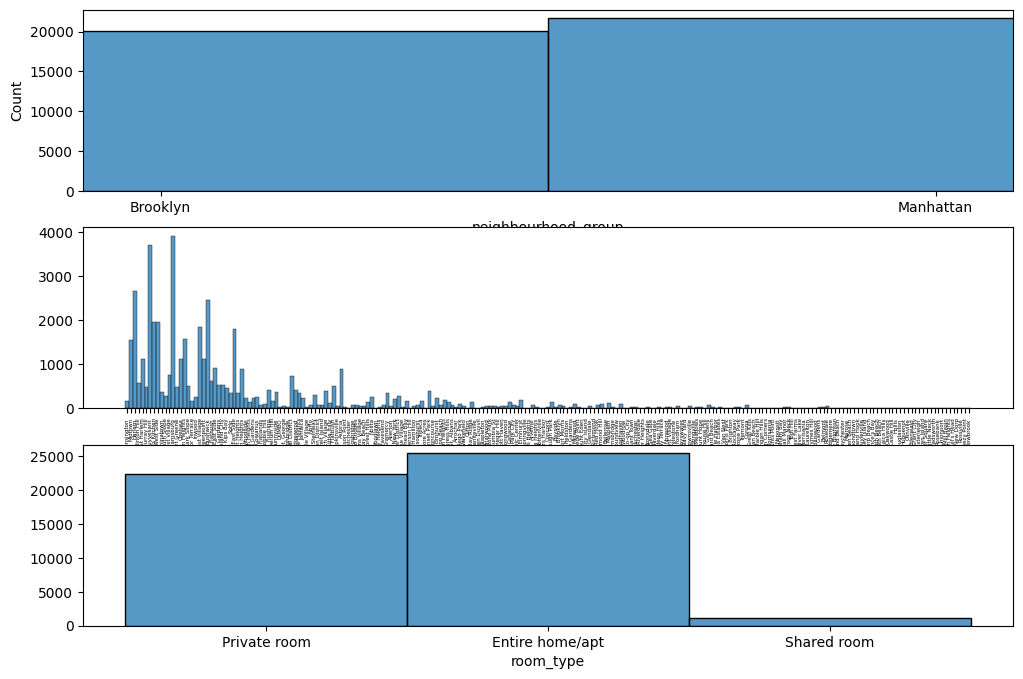

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns


# CATEGÓRICAS 


fig, axis = plt.subplots(3, figsize=(12, 8))

# Create a multiple histogram
sns.histplot(ax = axis[0], data = total_data, x = "neighbourhood_group").set_xlim(-0.1, 1.1)
sns.histplot(ax = axis[1], data = total_data, x = "neighbourhood").set(ylabel = None)
sns.histplot(ax = axis[2], data = total_data, x = "room_type").set(ylabel = None)

axis[1].tick_params(axis='x', rotation=90, labelsize=4)
plt.show()



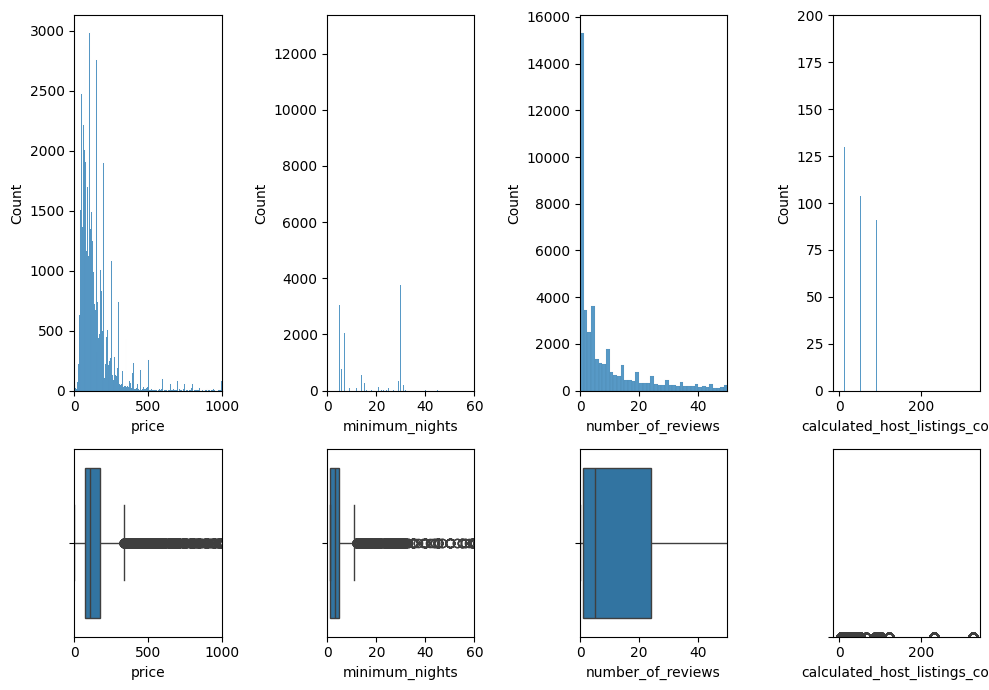

In [8]:
# NUMÉRICAS
fig, axis = plt.subplots(2, 4, figsize = (10, 7), gridspec_kw={'height_ratios': [2, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = total_data, x = "price").set_xlim(0, 1000)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "price").set_xlim(0, 1000)
sns.histplot(ax = axis[0, 1], data = total_data, x = "minimum_nights").set_xlim(0, 60)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "minimum_nights").set_xlim(0, 60)
sns.histplot(ax = axis[0, 2], data = total_data, x = "number_of_reviews").set_xlim(0, 50)
sns.boxplot(ax = axis[1, 2], data = total_data, x = "number_of_reviews").set_xlim(0, 50)
sns.histplot(ax = axis[0, 3], data = total_data, x = "calculated_host_listings_count").set_ylim(0, 200)
sns.boxplot(ax = axis[1, 3], data = total_data, x = "calculated_host_listings_count").set_ylim(0, 200)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()



# MULTIVARIANTE numérico-numérico

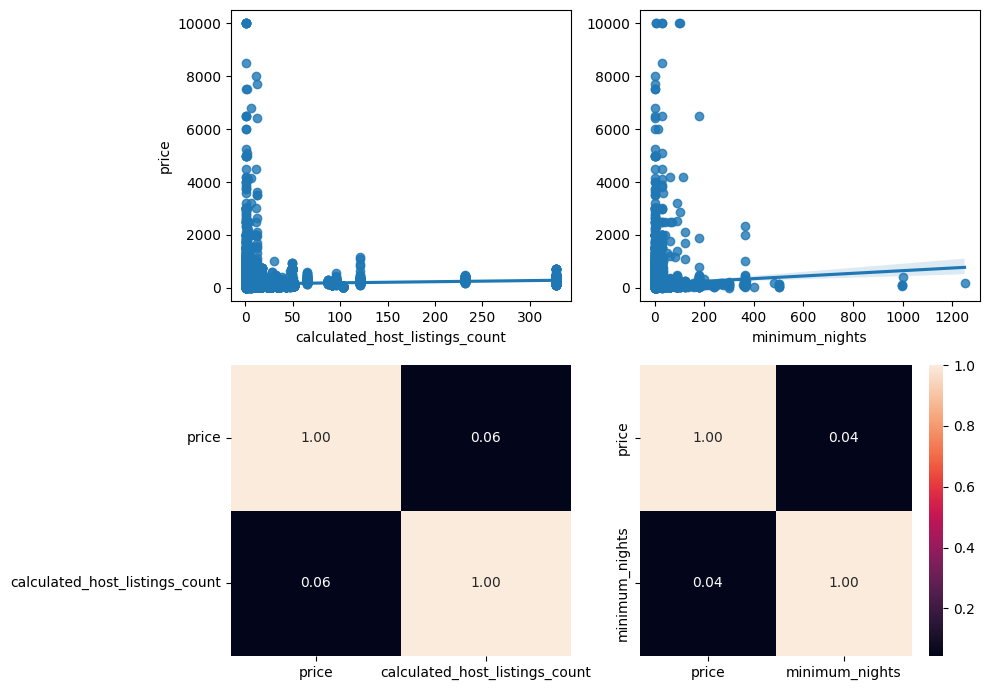

In [9]:

fig, axis = plt.subplots(2, 2, figsize = (10, 7))

sns.regplot(ax = axis[0, 0], data = total_data, x = "calculated_host_listings_count", y = "price")
sns.heatmap(total_data[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "minimum_nights", y = "price").set(ylabel=None)
sns.heatmap(total_data[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

CONCLUSIONES: Como se puede observar en los gráficos mostrados arriba, no se encuentra una relación que pueda hacernos pensar que el precio de un listing y el número de propiedades que tienen un host o el mínimo de noches disponibles del mismo, tengan peso en el precio por el que se lista el alojamiento.

MULTIVARIANTE categórico-categórico

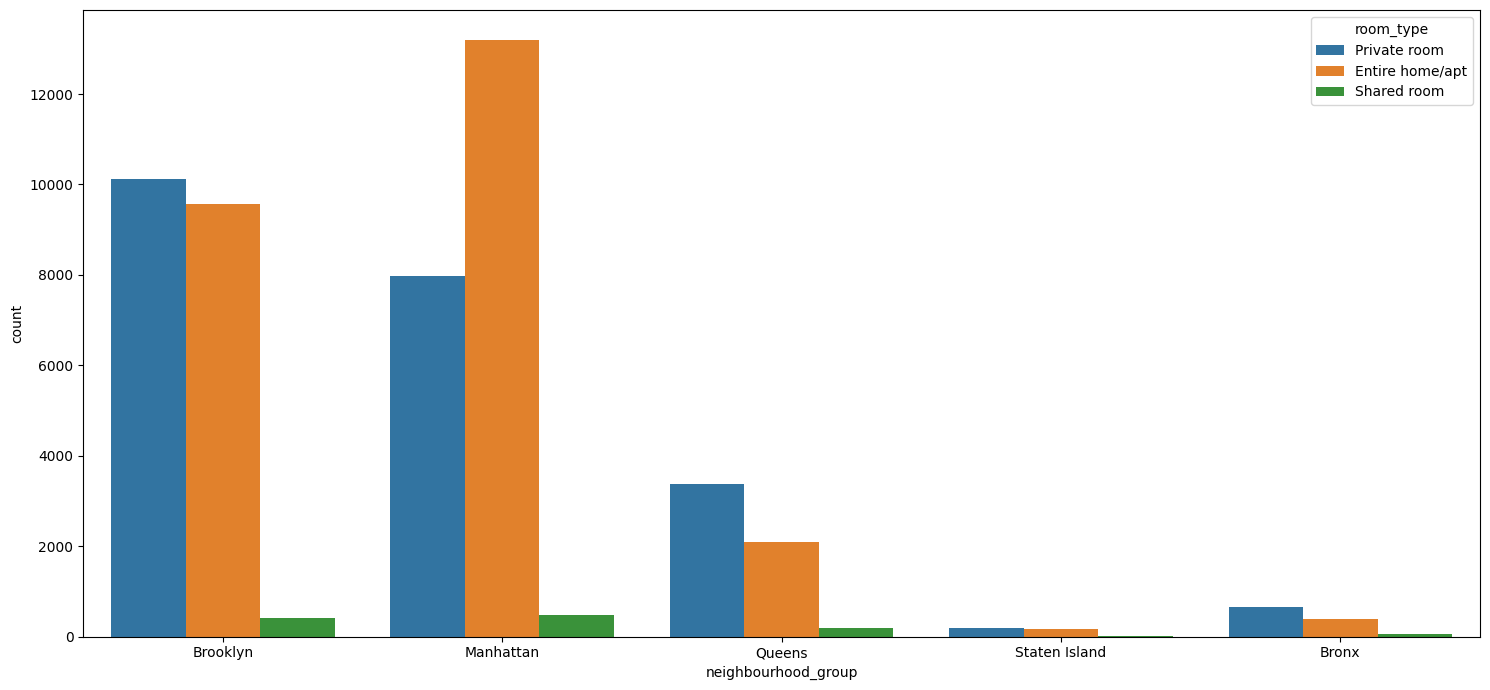

In [10]:
fig, axis = plt.subplots(1, figsize = (15, 7))

sns.countplot(data = total_data, x = "neighbourhood_group", hue = "room_type")

plt.tight_layout()

plt.show()

CONCLUSIONES (no me deja poner markdown): Se observa que lo que se oferta menos es habitaciones compartidas. Así pues resalta el área de Manhattan por ser la única que la mayor oferta son los apartamentos completos. La mayor oferta general es la de habitaciones privadas (Brooklyn, Queens, Staten Island, Bronx).  

# Combinaciones de la clase con varias predictoras

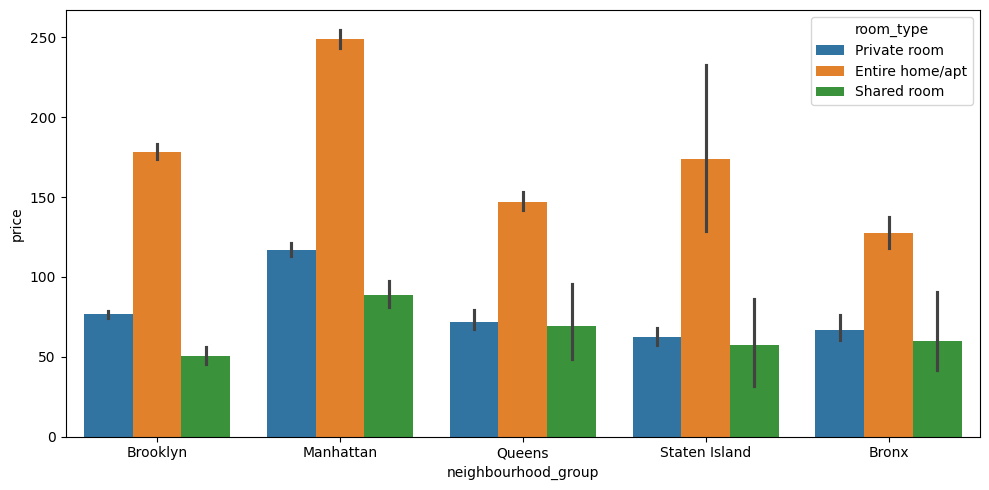

In [11]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 1)

sns.barplot(data = total_data, x = "neighbourhood_group", y = "price", hue = "room_type")

plt.tight_layout()

plt.show()

CONCLUSIONES: En el anterior gráfico podemos observar como varían los precios según barrio y tipo de alojamiento: habitación compartida, habitación, alojamiento completo. Así pues hay diversos puntos a destacar, entre los cuales podemos observar que Manhattan tiene más cantidades general de alojamientos disponibles y Bronx el que menos. Por otro lado, a nivel de precios como comentabamos, si bien Manhattan distaca por tener los precios más altos en alojamientos enteros y habitaciones privadas, los precios de las habitaciones compartidas se mantiene muy estable entre todos los barrios de NY por lo que, grosso modo, nos puede hacer pensar que la elección de este tipo de alojamiento debe venir más dada por o bien necesidad del área del cliente o disponibilidad para el momento de la estancia que por el precio in se. Por otro lado, si bien ligeramente los precios de habitaciones privadas son más elevados que las compartidas, la variación de precio vs éstas es mínimo. A nivel de alojamientos completos, el precio de Staten Island y Brooklyn es prácticamente equivalente. Así pues a nivel general podría darnos a pensar que NY mantiene unos precios bien equilibrados por ti po de habitación siendo muy poco relevante las diferencias de habitaciones privadas o compartidas, ni siquiera afectando el barrio (a excepción de Manhattan). Las diferencias vienen en los alojamientos privados, y, sobre todo en Manhattan donde claramente se ve una subida de precio de los mismos. En este caso desconocemos características de dichos alojamientos/ personas que pueden alojarse en el mismo, etc., datos que podrían ser relevantes para el análisis.

ANALISIS DE CORRELACIONES

In [14]:
total_data["neighbourhood_group_n"] = pd.factorize(total_data["neighbourhood_group"])[0]
total_data[["neighbourhood_group_n", "neighbourhood_group"]]

,neighbourhood_group_n,neighbourhood_group
0,0,Brooklyn
1,1,Manhattan
2,1,Manhattan
3,0,Brooklyn
4,1,Manhattan
...,...,...
48890,0,Brooklyn
48891,0,Brooklyn
48892,1,Manhattan
48893,1,Manhattan


In [15]:
neighbourhood_group_rules = {row["neighbourhood_group"]: row["neighbourhood_group_n"] for index, row in total_data[["neighbourhood_group_n", "neighbourhood_group"]].drop_duplicates().iterrows()}
print(neighbourhood_group_rules)

import json

# Escritura
with open("./neighbourhood_group_rules.json", "w") as f:
  json.dump(neighbourhood_group_rules, f)

# Lectura
# ESTO NO NECESITAIS HACERLO AHORA. LO ENTENDEREIS MAS ADELANTE :)
with open("./neighbourhood_group_rules.json", "r") as f:
  neighbourhood_group_rules = json.load(f)
print("2", neighbourhood_group_rules)

total_data["neighbourhood_group_n"] = total_data["neighbourhood_group"].apply(lambda x: neighbourhood_group_rules[x])
total_data


{'Brooklyn': 0, 'Manhattan': 1, 'Queens': 2, 'Staten Island': 3, 'Bronx': 4}
2 {'Brooklyn': 0, 'Manhattan': 1, 'Queens': 2, 'Staten Island': 3, 'Bronx': 4}


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_n
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,1
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,1
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,0
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,0
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,0
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,1
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,1


In [16]:
total_data["room_type_n"] = pd.factorize(total_data["room_type"])[0]
total_data[["room_type_n", "room_type"]]

,room_type_n,room_type
0,0,Private room
1,1,Entire home/apt
2,0,Private room
3,1,Entire home/apt
4,1,Entire home/apt
...,...,...
48890,0,Private room
48891,0,Private room
48892,1,Entire home/apt
48893,2,Shared room


In [17]:
total_data["room_type_n"] = pd.factorize(total_data["room_type"])[0]
total_data[["room_type_n", "room_type"]]
room_type_rules = {row["room_type"]: row["room_type_n"] for index, row in total_data[["room_type_n", "room_type"]].drop_duplicates().iterrows()}
print(room_type_rules)

import json

# Escritura
with open("./room_type_rules.json", "w") as f:
  json.dump(room_type_rules, f)
# Lectura
# ESTO NO NECESITAIS HACERLO AHORA. LO ENTENDEREIS MAS ADELANTE :)
with open("./room_type_rules.json", "r") as f:
  room_type_rules = json.load(f)
print("2", room_type_rules)

total_data["room_type_n"] = total_data["room_type"].apply(lambda x: room_type_rules[x])
total_data

{'Private room': 0, 'Entire home/apt': 1, 'Shared room': 2}
2 {'Private room': 0, 'Entire home/apt': 1, 'Shared room': 2}


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_n,room_type_n
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0,0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,1,1
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,1,0
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,0,1
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,0,0
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,0,0
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,1,1
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,1,2


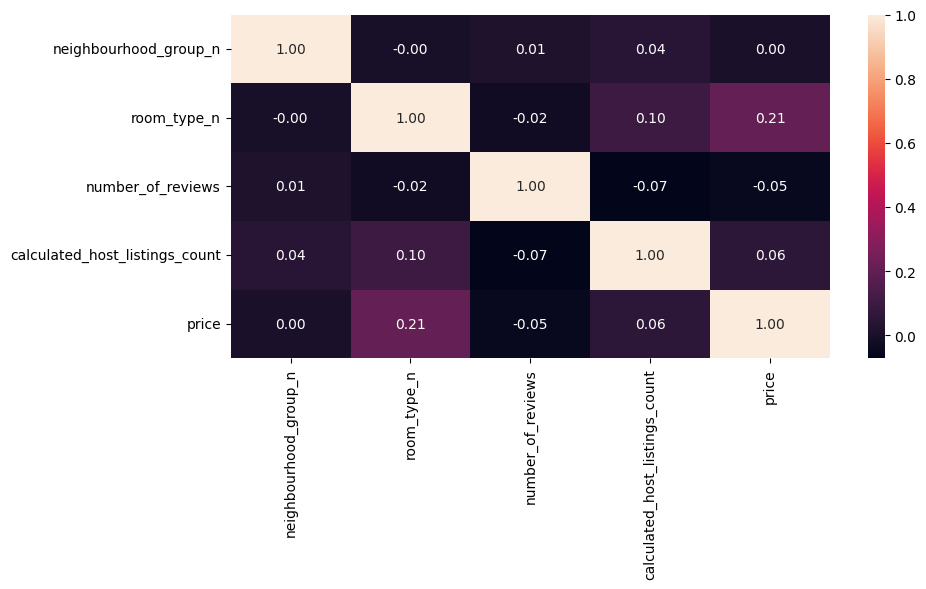

In [18]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data[["neighbourhood_group_n", "room_type_n", "number_of_reviews", "calculated_host_listings_count", "price"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

CONCLUSIONES: En el anterior análisis de correlaciones mostrado en un heatmap o mapa de calor, donde los valores más cercanos a "1" darían lugar a análisis más profundo por correlación entre variables, el elemento más destacable sería el precio por tipo de habitación, como ya también habíamos observado previamente en el anterior gráfico, así como también el room type y calculated host listing count, es decir, el tipo de habitación (en este caso, habitaciones) que puede tener un mismo host/usuario en alquiler en Airbnb en NY. En este caso pudiendo entender que esto se da, sobretodo en habitaciones y no en alojamientos completos en caso de particulares, dato que sería interesante poder analizar más en profundidad. Pese a esto, grosso modo, no vemos grandes correlaciones entre datos en este caso que afecten al precio, exceptuando la primera, es decir : precio - tipo de alojamiento (habitación privada, compartida, alojamiento completo).

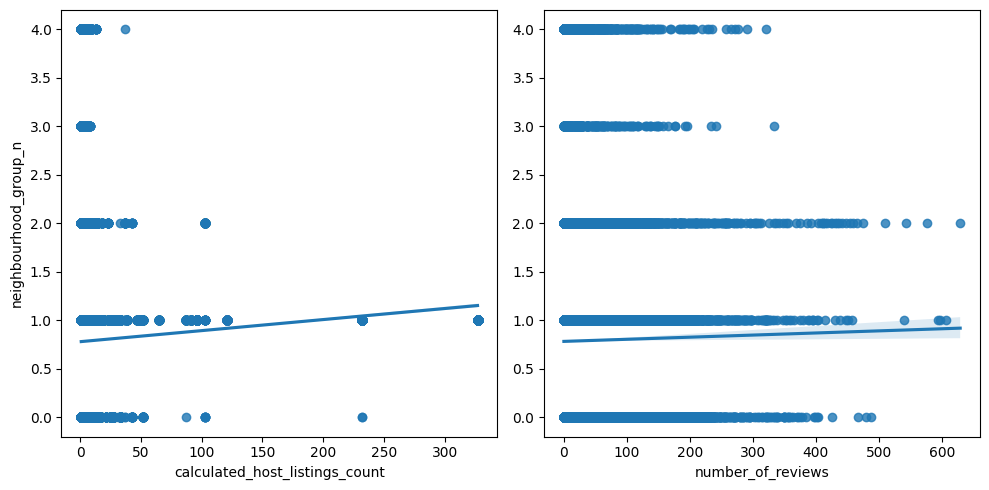

In [20]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)
sns.regplot(ax = axis[0], data = total_data, x = "calculated_host_listings_count", y = "neighbourhood_group_n")
sns.regplot(ax = axis[1], data = total_data, x = "number_of_reviews", y = "neighbourhood_group_n").set(ylabel = None)
plt.tight_layout()
plt.show()


CONCLUSIONES: En los dos gráficos de regresión (regplots) que vemos arriba en los que se ha intentado valorar una posible relación entre calculated host listings count y barrio, y por otro lado, number of reviews con el barrio, si bien en el primer caso la pendiente de regresión es ligeramente positiva, lo cual nos podría indicar una ligera relación entre número de propiedades por usuario y barrio (lo cual sería lógico en el caso que comentabamos anteriormente de que normalmente esto se da en una misma propiedad en habitaciones o bien privadas o compartidas), en el segundo caso vemos una línea cuya pendiente es cercana a cero por lo que podríamos decir que no hay relación entre el barrio y número de reseñas del alojamiento. En cuanto a las nubes de puntos de ambos gráficos, pese a ciertas excepciones que encontramos en el número de propiedades y en el número de reseñas, generalmente podemos decir que no etan agrupados alrededor de la línea de regresión por lo que dichas relaciones son débiles.